In [74]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [75]:
# Prepare the dataset by removing some unnecessary columns
# Note: we removed some header rows from the table before importing, as well
full_df = pd.read_csv('data/Population_estimates_LA_2018.csv')[:-1]
df = full_df.drop(columns=['mnemonic','Total'])
x_cols = df.columns[1:] # will use this later during clustering analysis
df.head() # dataframe is already in a matrix, but use pd.pivot_table if not

,local authority: district / unitary (as of April 2019),Aged under 1 year,Aged 1 - 4 years,Aged 5 - 9 years,Aged 10 - 14 years,Aged 15 - 19 years,Aged 20 - 24 years,Aged 25 - 29 years,Aged 30 - 34 years,Aged 35 - 39 years,Aged 40 - 44 years,Aged 45 - 49 years,Aged 50 - 54 years,Aged 55 - 59 years,Aged 60 - 64 years,Aged 65 - 69 years,Aged 70 - 74 years,Aged 75 - 79 years,Aged 80 - 84 years,Aged 85 and over
0,Darlington,1100,4800,6700,6400,5700,5400,6300,6600,6600,6300,7400,7900,7500,6400,6000,5700,3900,3100,2900
1,County Durham,5000,22000,30000,28600,29100,35900,33500,30100,30600,27700,35400,39700,37400,33500,31600,30100,19900,14600,12300
2,Hartlepool,1000,4300,6000,5600,5200,5400,6000,6000,5400,4900,6200,6900,6800,5600,5300,4600,3100,2600,2300
3,Middlesbrough,1900,7800,9600,8600,8400,11700,11000,9400,8100,7300,8200,9000,9000,7900,6600,5900,4200,3300,2800
4,Northumberland,2900,12000,17000,17200,15900,14400,16500,17000,17700,17000,21400,24600,25500,23400,22600,21500,14000,10200,9300


In [86]:
birmingham = df[df['local authority: district / unitary (as of April 2019)'] == 'Birmingham']
birmingham

,local authority: district / unitary (as of April 2019),Aged under 1 year,Aged 1 - 4 years,Aged 5 - 9 years,Aged 10 - 14 years,Aged 15 - 19 years,Aged 20 - 24 years,Aged 25 - 29 years,Aged 30 - 34 years,Aged 35 - 39 years,Aged 40 - 44 years,Aged 45 - 49 years,Aged 50 - 54 years,Aged 55 - 59 years,Aged 60 - 64 years,Aged 65 - 69 years,Aged 70 - 74 years,Aged 75 - 79 years,Aged 80 - 84 years,Aged 85 and over
129,Birmingham,16100,67500,83400,78400,79700,104600,96600,83000,77100,66600,68300,65700,58400,48000,41100,36100,27300,21700,21700


In [89]:
df = df.drop(129) # Drop Birmingham from the table, seems to be an outlier

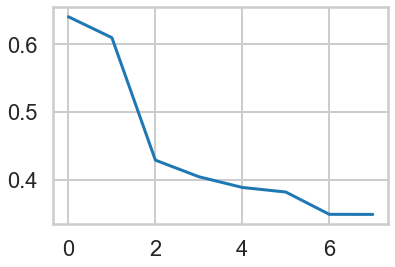

In [93]:
# KMeans clustering analysis
# First, we will use sklearn Silhouette Score to find optimal k
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df[x_cols] # revert back to matrix from beginning, without various k-value cluster values
range_n_clusters = range(2,10)
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_scores.append(score) # add to the list, for graphing
    #print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    
    
# Create bar graph of silhouette scores
plt.plot(silhouette_scores)

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

cluster_df = pd.DataFrame()
cluster_df['LA'] = df['local authority: district / unitary (as of April 2019)']
MSE_errors = []
k_range = range(2,20)
for i in k_range:
    cluster = KMeans(n_clusters=i, random_state=10)
    clusters = cluster.fit_predict(df[x_cols])
    cluster_df['k_clusters_' + str(i)] = clusters
    pca = PCA(n_components=2)
    centroid = pca.fit_transform(df[x_cols])
    for x in clusters:
        error = (x - centroid)**2
    MSE_errors.append(np.sum(error))

In [95]:
# Fit transform PCA to the data array
pca =  PCA(n_components=2)
x_y = pca.fit_transform(X)

# Create new data frame with the four values
pca_df = cluster_df[['LA','k_clusters_4']] # choosing cluster with k=2 from the silhouette score above
pca_df['x'] = [x[0] for x in x_y]
pca_df['y'] = [x[1] for x in x_y]
pca_df.columns = ['name','clusters','x','y']

# Print dataframe
pca_df

C:\Users\David.Bender\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David.Bender\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,clusters,x,y
0,Darlington,0,-15870.848298,-748.001695
1,County Durham,2,82368.612445,23331.314708
2,Hartlepool,0,-18760.441233,-2230.128990
3,Middlesbrough,3,-6635.699956,-3955.612054
4,Northumberland,1,31248.009803,20856.099755
...,...,...,...,...
377,Lisburn and Castlereagh,3,-6530.819251,-512.264924
378,Mid and East Antrim,3,-8146.225730,497.404890
379,Mid Ulster,3,-4986.315943,-3435.033844
380,"Newry, Mourne and Down",3,2339.143227,-260.174955


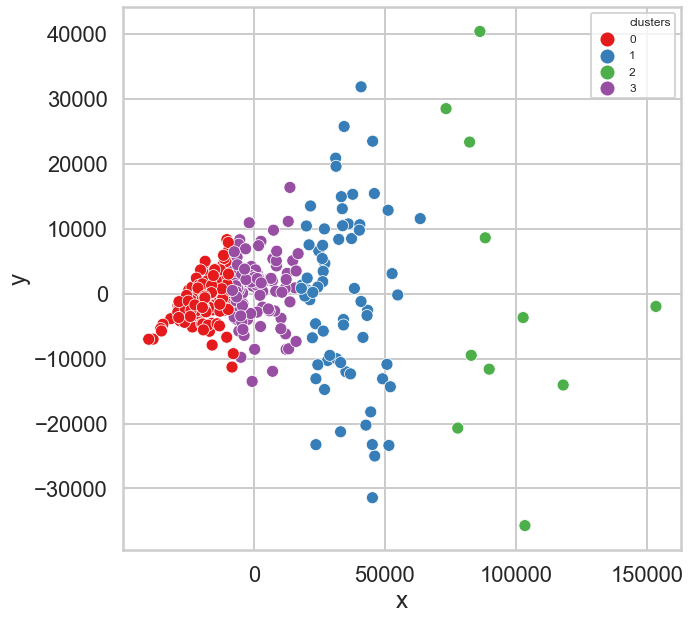

In [96]:
plt.figure(figsize=(10,10))
sns.scatterplot(pca_df.x, pca_df.y, hue=pca_df.clusters, palette='Set1',legend='full')

#for i in range(len(pca_df)):
#    if (pca_df.clusters.iloc[i] == 3) | (pca_df.clusters.iloc[i] == 2):
#        plt.annotate(pca_df.iloc[i]['name'], (pca_df.iloc[i]['x'], pca_df.iloc[i]['y']), fontsize=8)
plt.legend(fontsize=12)
plt.show()

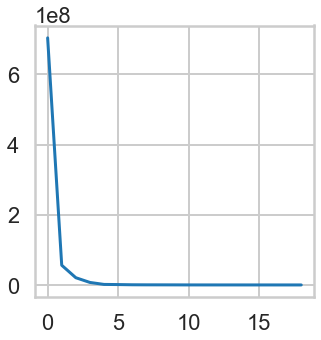

In [97]:
# Initialize a new PCA model with a default number of components.
pca = PCA()
pca.fit(X)

# Do the rest on your own :)

variances = pca.explained_variance_
plt.figure(figsize=(5,5))
plt.plot(variances)
plt.show()

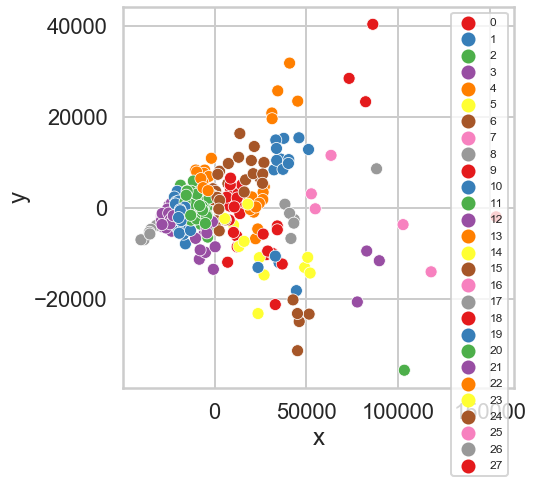

In [98]:
## We will look at other clustering approaches

# 1. Affinity propagation

from sklearn.cluster import AffinityPropagation

aff_prop = AffinityPropagation(damping=0.9)
aff_prop.fit_predict(X)
AP_labels = aff_prop.labels_

## Plot with the colours from the Affinity Propogation
plt.figure(figsize=(7,7))
sns.scatterplot(pca_df.x, pca_df.y, hue=AP_labels, palette='Set1',legend='full')
plt.legend(fontsize=12)
plt.show()

C:\Users\David.Bender\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


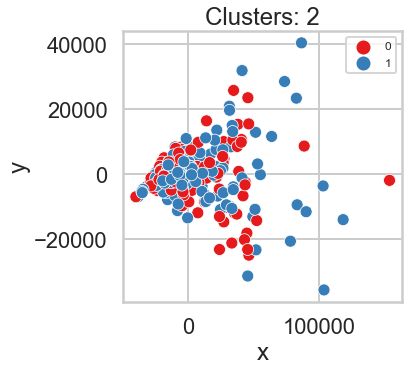

C:\Users\David.Bender\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


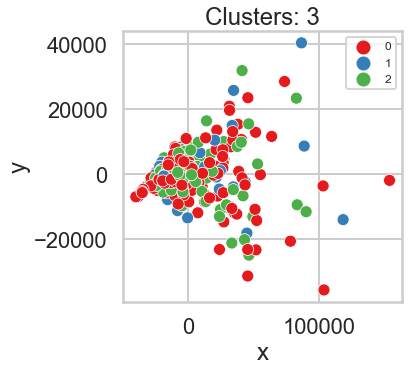

C:\Users\David.Bender\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


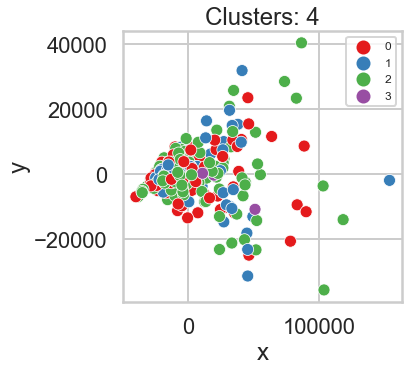

C:\Users\David.Bender\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


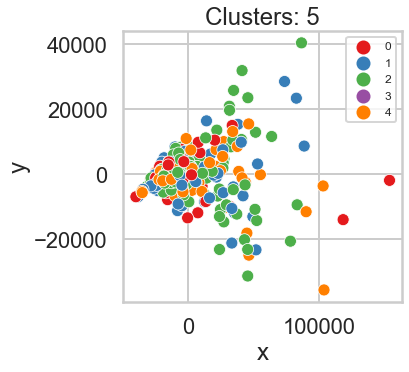

C:\Users\David.Bender\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


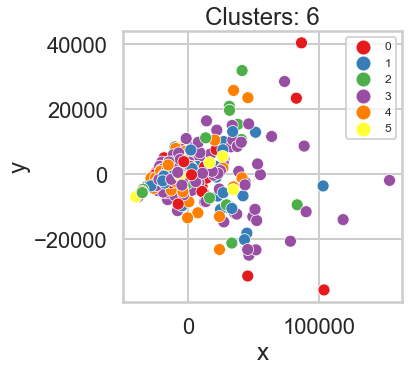

C:\Users\David.Bender\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


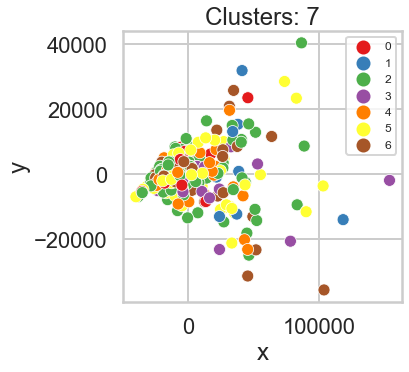

C:\Users\David.Bender\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


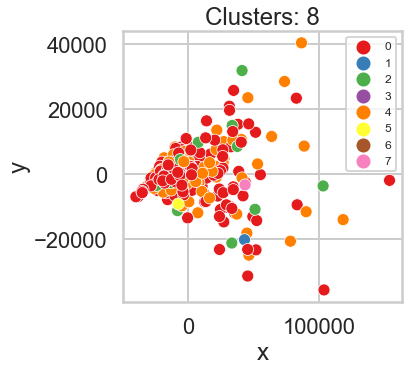

In [99]:
from sklearn.cluster import SpectralClustering

n_clusters = [2,3,4,5,6,7,8] #iterate over the better performing k-values
for x in n_clusters:
    spec_cluster = SpectralClustering(n_clusters=x)
    spec_cluster.fit_predict(X)
    SC_labels = spec_cluster.labels_

    ## Plot with the colours from the Spectral Clustering
    plt.subplots(1,1, sharex=True, figsize=(5,5))
    sns.scatterplot(pca_df.x, pca_df.y, hue=SC_labels, palette='Set1',legend='full')
    plt.legend(loc='upper right',fontsize=12)
    plt.title('Clusters: {}'.format(x))
    plt.show()

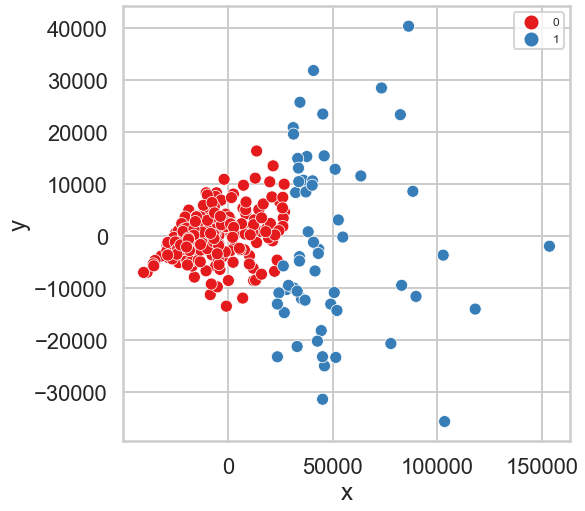

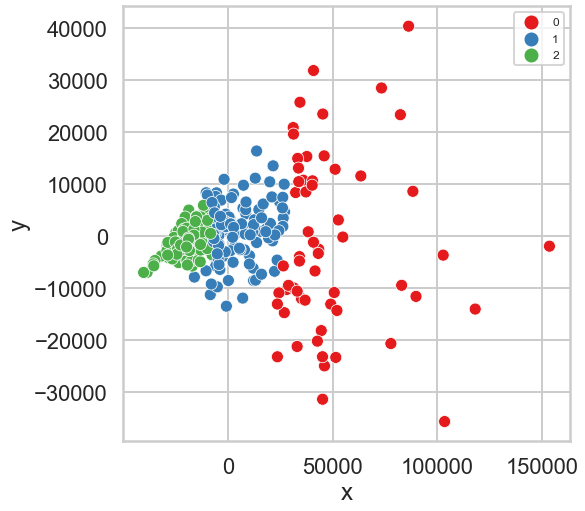

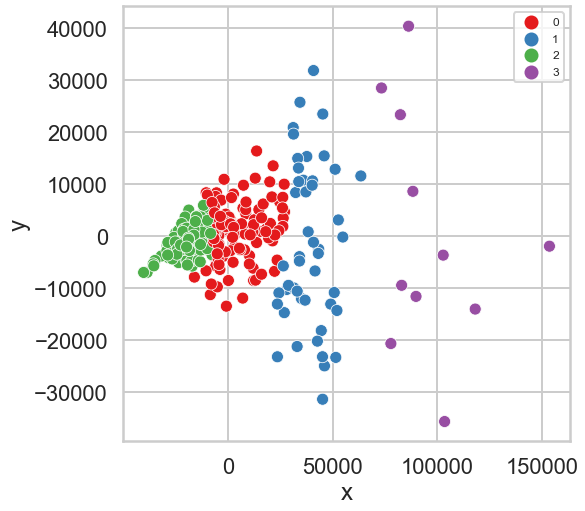

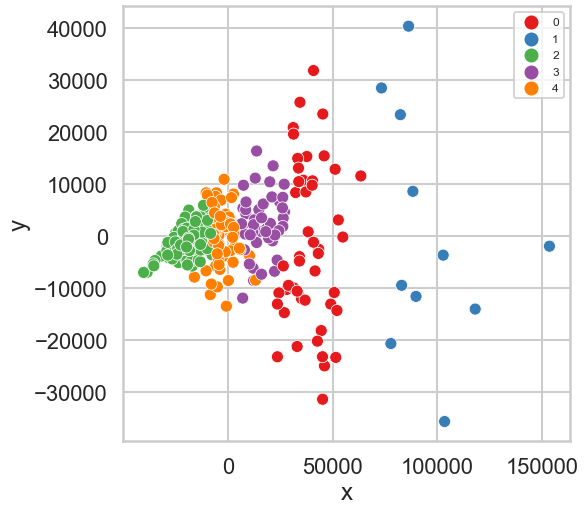

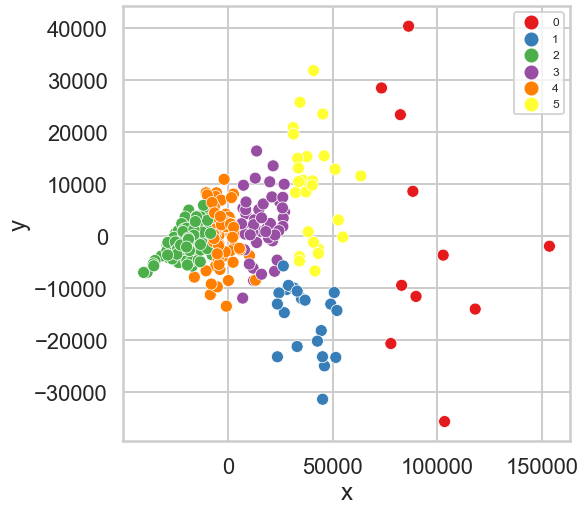

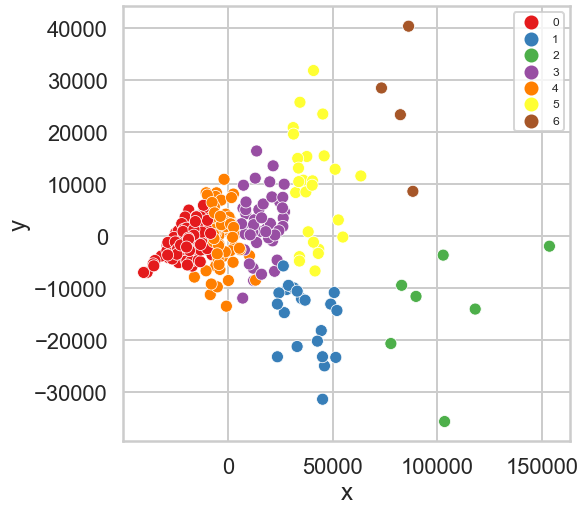

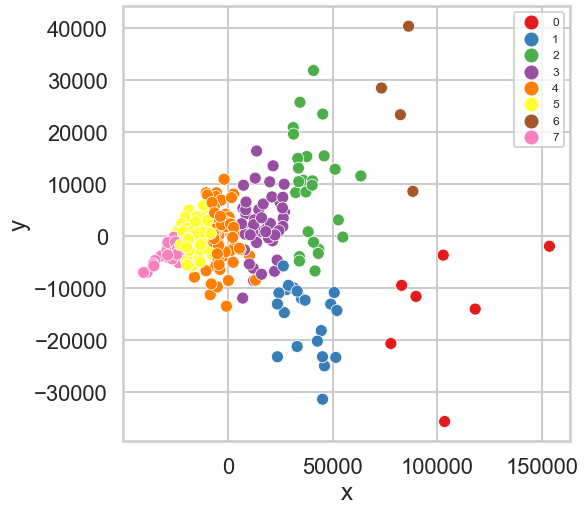

In [100]:
# 3. Agglomorative clustering

from sklearn.cluster import AgglomerativeClustering

for x in n_clusters:
    agg_cluster = AgglomerativeClustering(n_clusters=x)
    agg_cluster.fit_predict(X)
    AG_labels = agg_cluster.labels_

    ## Plot with the colours from Agglomerative Clustering
    plt.subplots(1,1, sharex=True, figsize=(8,8))
    sns.scatterplot(pca_df.x, pca_df.y, hue=AG_labels, palette='Set1',legend='full')
    plt.legend(loc='upper right',fontsize=12)
    plt.show()